### 1. Install and import all necessary libraries in Jupyter 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [6]:
# Ensures the graphs are displayed without the need to "call" them specifically.

%matplotlib inline

### 2. Import data and conduct any necessary cleaning, manipulations, and reprocessing

In [4]:
# Import file

df = pd.read_csv(r'/Users/matthewerrington/Downloads/airbnb_jan8b - Sheet1.csv', index_col = False)

In [5]:
df.head()

,search,airbnb-href,rating,reviews,city,price,type,population,michelin,mich_pop
0,Toulon,https://www.airbnb.com/rooms/27745967?adults=2...,NaN,NaN,"Toulon, Provence-Alpes-Côte d'Azur, France",NaN,NaN,171953,NaN,NaN
1,Saint-Étienne,https://www.airbnb.com/rooms/46489673?adults=2...,NaN,NaN,"Saint-Priest-en-Jarez, Auvergne-Rhône-Alpes, F...",NaN,Entire home,172565,NaN,NaN
2,Saint-Étienne,https://www.airbnb.com/rooms/46922331?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN
3,Saint-Étienne,https://www.airbnb.com/rooms/46095645?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN
4,Saint-Étienne,https://www.airbnb.com/rooms/46029264?adults=2...,NaN,NaN,"Saint-Étienne, Auvergne-Rhône-Alpes, France",NaN,Entire home,172565,NaN,NaN


In [25]:
del df['mich_pop']

In [26]:
df.head()

,rating,reviews,price,population
0,4.721213,87.321327,60.496916,171953
1,4.721213,87.321327,60.496916,172565
2,4.721213,87.321327,60.496916,172565
3,4.721213,87.321327,60.496916,172565
4,4.721213,87.321327,60.496916,172565


In [27]:
df['reviews'].fillna((df['reviews'].mean()), inplace=True)

In [28]:
df['price'].fillna((df['price'].mean()), inplace=True)

In [29]:
df['rating'].fillna((df['rating'].mean()), inplace=True)

In [30]:
df.isnull().sum()

rating        0
reviews       0
price         0
population    0
dtype: int64

### 3. Use the Elbow Technique 

In [31]:
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [32]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-1585660669533267.8,
 -220396263312165.9,
 -57639429573389.75,
 -17659081978083.18,
 -3855876711756.7197,
 -1599078603831.0537,
 -872797808131.4834,
 -610357507785.8922,
 -367732900018.90436]

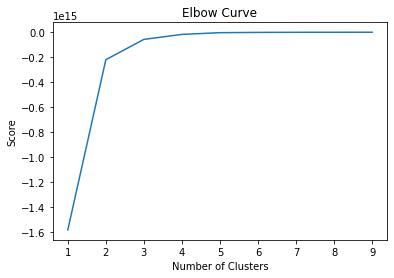

In [33]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The curve flattens out after 4 clusters. The optimal count of clusters is 3 or 4.

### 5. Run the k-means algorithm

In [34]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 

In [35]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/matthewerrington/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [36]:
df['clusters'] = kmeans.fit_predict(df)

/Users/matthewerrington/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [37]:
df.head()

,rating,reviews,price,population,clusters
0,4.721213,87.321327,60.496916,171953,0
1,4.721213,87.321327,60.496916,172565,0
2,4.721213,87.321327,60.496916,172565,0
3,4.721213,87.321327,60.496916,172565,0
4,4.721213,87.321327,60.496916,172565,0


In [38]:
df['clusters'].value_counts()

0    4937
2     834
3     467
1     415
Name: clusters, dtype: int64

### 7. Create a few different visualizations using the clustered data. Try plotting different variables against each other to see the results.

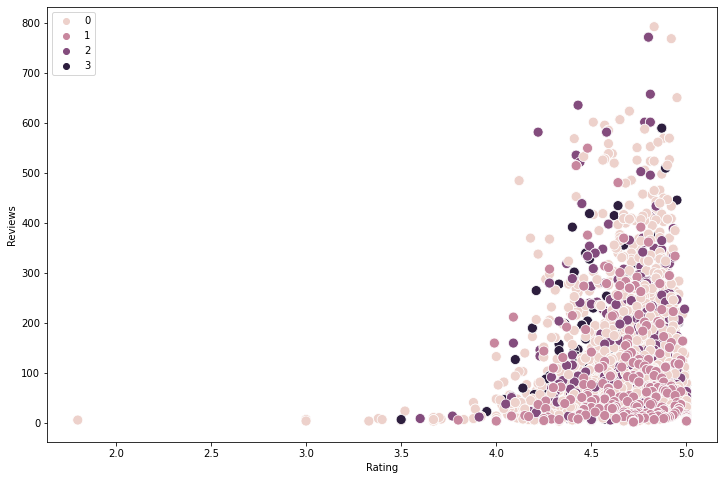

In [39]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rating'], y=df['reviews'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Rating')
plt.ylabel('Reviews') 
plt.show()

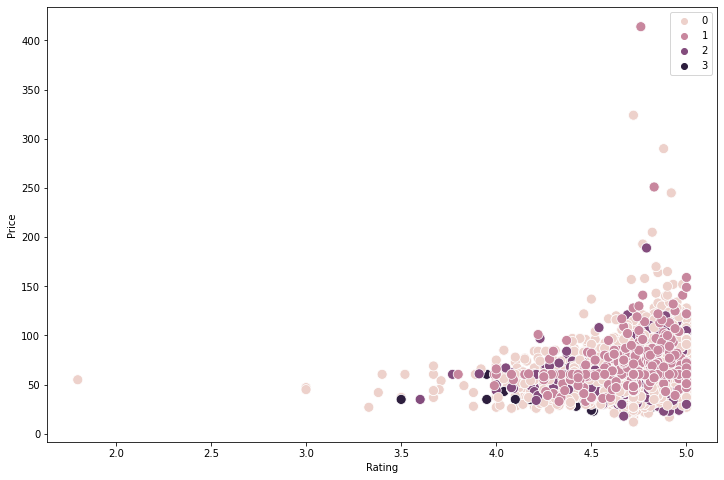

In [40]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rating'], y=df['price'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Rating')
plt.ylabel('Price') 
plt.show()

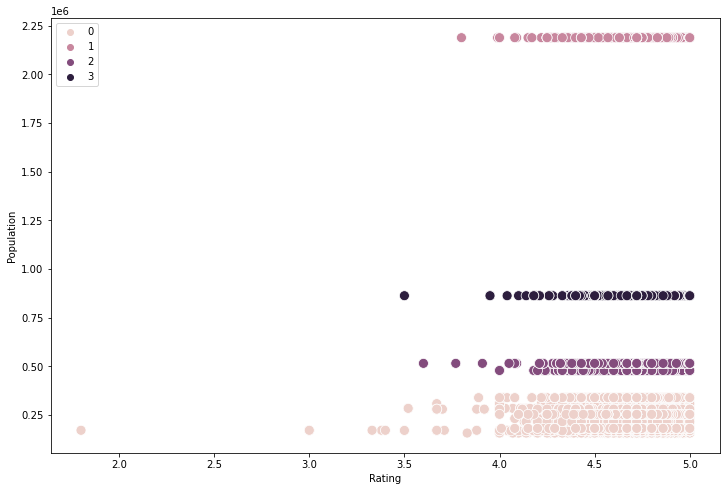

In [41]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['rating'], y=df['population'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Rating')
plt.ylabel('Population') 
plt.show()

### 8. Discuss how and why the clusters make sense

It is hard to discern anything from the first two scatterplots. 

The final scatterplot shows that the clusters center around size of the population of a particular city. That may mean the size of the city has less influence on rating, price, or reviews.

### 9. Calculate the descriptive statistics for the clusters using groupby() function. Discuss your findings.

In [45]:
df.loc[df['clusters'] == 3, 'cluster'] = 'large city'
df.loc[df['clusters'] == 2, 'cluster'] = 'mid city'
df.loc[df['clusters'] == 1, 'cluster'] = 'Paris'
df.loc[df['clusters'] == 0, 'cluster'] = 'small city'

In [46]:
df.groupby('cluster').agg({'rating':['mean', 'median'], 
                         'reviews':['mean', 'median'], 
                         'price':['mean', 'median'],
                          'population':['mean', 'median']})

rating               reviews             price             \
                mean    median        mean median       mean     median   
cluster                                                                   
Paris       4.697918  4.721213   92.736482   63.0  70.802819  60.496916   
large city  4.700945  4.730000  110.312171   78.0  53.023040  50.000000   
mid city    4.732795  4.780000  105.821084   66.5  59.919802  60.496916   
small city  4.723132  4.750000   81.566252   52.0  60.435070  60.496916   

              population           
                    mean   median  
cluster                            
Paris       2.187526e+06  2187526  
large city  8.633100e+05   863310  
mid city    4.978663e+05   516092  
small city  2.314663e+05   232787

Interestingly, the largest population (cluster 1) had lower review counts but the highest mean price. Perhaps the larger amount of properties leads to lower review count. The small and medium population cities had properties with a mean price significantly under the largest. 

Mid-sized cities produced higher review counts than the smallest or largest cities.

### 10. Propose what these results could be useful for in future steps of an analytical pipeline

It's interesting to see that the cities directly beneath Paris have lower average prices than smaller cities in France. Would want to investigate this more.

Since all ratings are so similiar... does AirBnB simply remove listings with lower ratings after a certain time period? Out of 6,000 listings only a handful are below '4' - would expect to find more.